In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #data visualization 
sns.set_style("white")

In [2]:

Computer_Games = pd.read_csv("computer_games.csv")
Computer_Games

,Name,Developer,Producer,Genre,Operating System,Date Released
0,A-Men 2,Bloober Team,Bloober Team,"Adventure, Puzzle",Microsoft Windows,"June 24, 2015"
1,A-Train,Artdink,"Artdink, Maxis, Ocean Software",Vehicle Simulation Game,"Windows, Mac",1985
2,A-10 Cuba!,Parsoft Interactive,Activision,Flight simulator,"Windows, Mac","November 30, 1996"
3,A.D. 2044,R.M.P. Software,LK Avalon,Adventure,Microsoft Windows,"September 6, 1996"
4,A.D.A.M. Life's Greatest Mysteries,Columbia Healthcare Corporation,Columbia Healthcare Corporation,Educational,Microsoft Windows,1996
...,...,...,...,...,...,...
1090,688(I) Hunter/Killer,Sonalysts Inc.,Electronic Arts,Submarine simulator,Microsoft Windows,"July 4, 1997"
1091,7 Colors,Gamos Ltd.,Infogrames,Strategy,"Amiga, DOS",1991
1092,7554,Emobi Games,Emobi Games,First-person shooter,Microsoft Windows,"December 16, 2011"
1093,7th Legion,"Vision, Epic MegaGames",MicroProse,RTS,Microsoft Windows,"September 30, 1997"


In [3]:
Computer_Games.shape

(1095, 6)

In [4]:
print("Shape of the dataset is",Computer_Games.shape)

Shape of the dataset is (1095, 6)


In [5]:
#checking for null values to comfirm that there are no NULL values in it.
Computer_Games.isna().value_counts()

Name   Developer  Producer  Genre  Operating System  Date Released
False  False      False     False  False             False            1095
Name: count, dtype: int64

In [7]:
Computer_Games.describe()

,Name,Developer,Producer,Genre,Operating System,Date Released
count,1095,1095,1095,1095,1095,1095
unique,1094,583,489,282,83,915
top,A Hat in Time,Maxis,Electronic Arts,First-person shooter,Microsoft Windows,1995
freq,2,30,84,103,600,9


In [8]:
Computer_Games['Developer'].value_counts()

Developer
Maxis                     30
Valve                     20
Square Enix               18
Blizzard Entertainment    18
Ubisoft Montreal          17
                          ..
Eagle Dynamics             1
Mimimi Games               1
Positech Games             1
Zombie Studios             1
Tribeca Interactive        1
Name: count, Length: 583, dtype: int64

In [9]:
#let's list top 10 developers
top_10_developers = Computer_Games['Developer'].value_counts().head(10)
top_10_developers

Developer
Maxis                          30
Valve                          20
Square Enix                    18
Blizzard Entertainment         18
Ubisoft Montreal               17
Quiet River                    12
BioWare                        11
Strategic Simulations, Inc.    11
Data Design Interactive        10
TalonSoft                      10
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Computer Games Developing Companies'}, ylabel='Developer'>

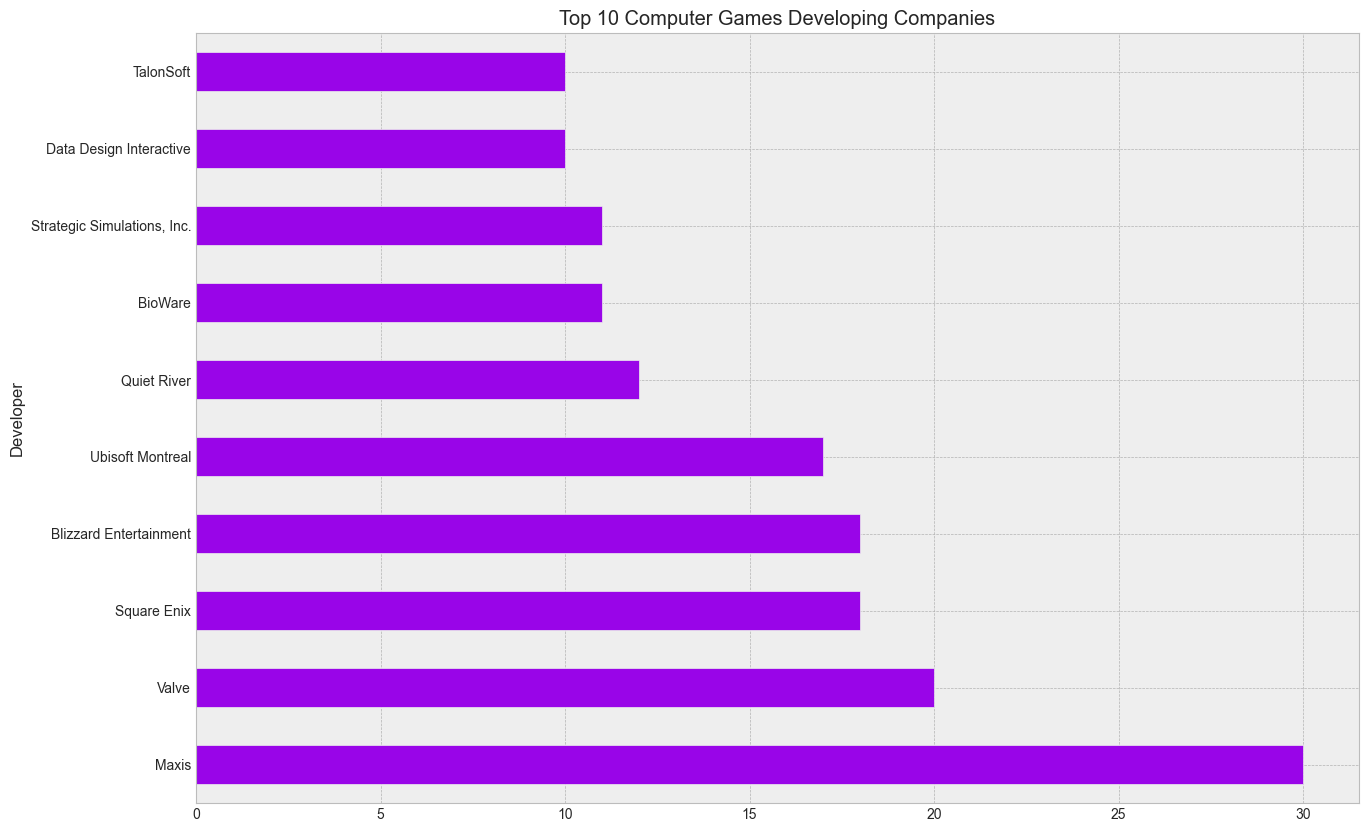

In [10]:
#top 10 game developing companies
plt.style.use("bmh")
plt.figure(figsize=(15,10))
top_10_developers.plot(kind="barh",color="#9905E8",title="Top 10 Computer Games Developing Companies")

In [11]:
#Now let's analyze the top 10 producing companies.
top_10_producers = Computer_Games['Producer'].value_counts().head(10)
top_10_producers

Producer
Electronic Arts           84
Ubisoft                   44
Square Enix               31
Eidos Interactive         28
Paradox Interactive       22
Valve                     20
Blizzard Entertainment    19
Microsoft Game Studios    18
Bethesda Softworks        15
Activision                14
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Computer Games Producing Companies'}, ylabel='Producer'>

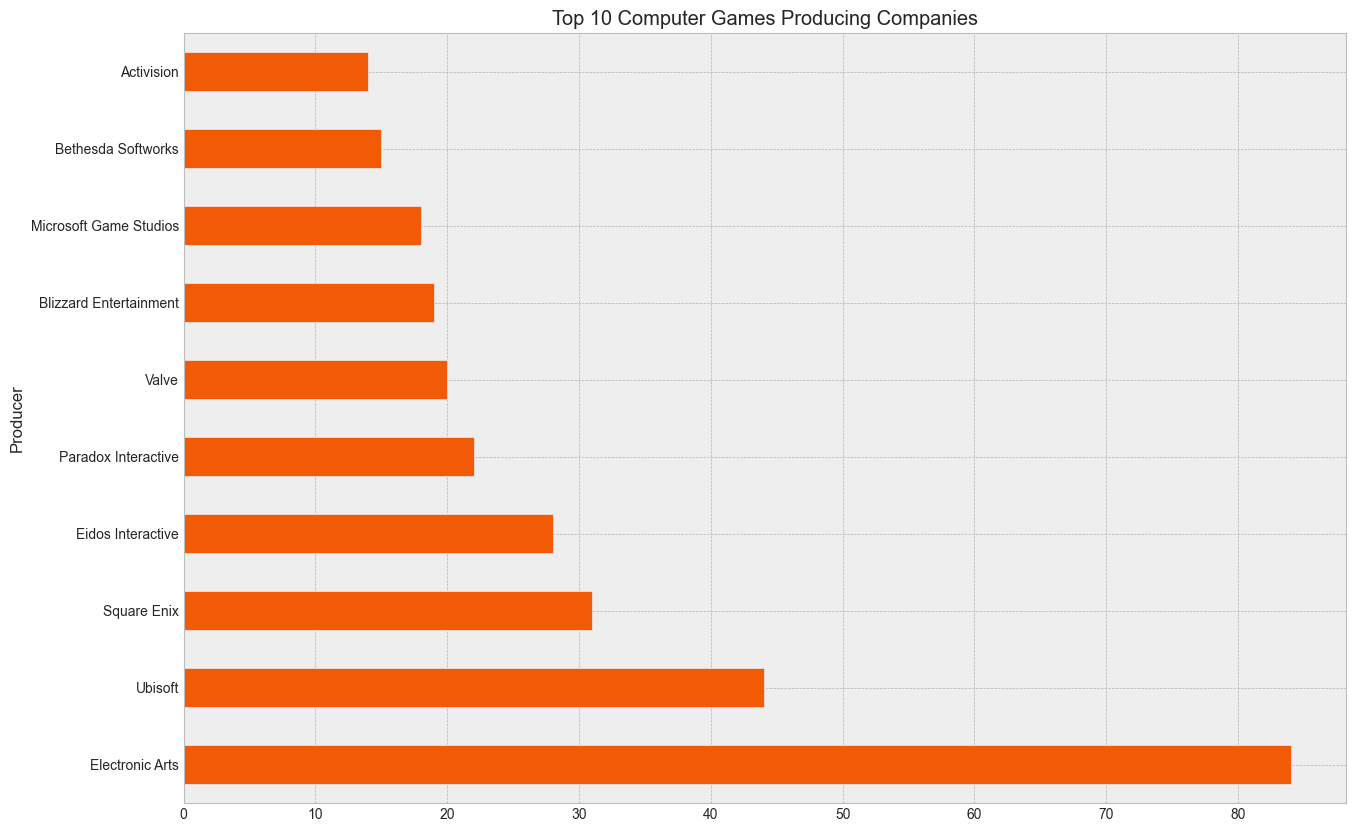

In [12]:
#top 10 game producing companies
plt.style.use("bmh")
plt.figure(figsize=(15,10))
top_10_producers.plot(kind="barh",color="#F25A05",title="Top 10 Computer Games Producing Companies")

In [13]:
# Now let's take a look at the game types
top_10_game_genres = Computer_Games["Genre"].value_counts().head(10)
top_10_game_genres

Genre
First-person shooter    103
RTS                      48
Action-adventure         42
Sports                   34
Role-playing             33
RPG                      30
Action role-playing      29
Life simulation          27
Adventure                23
Turn-based strategy      22
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Computer Game Genres'}, ylabel='Genre'>

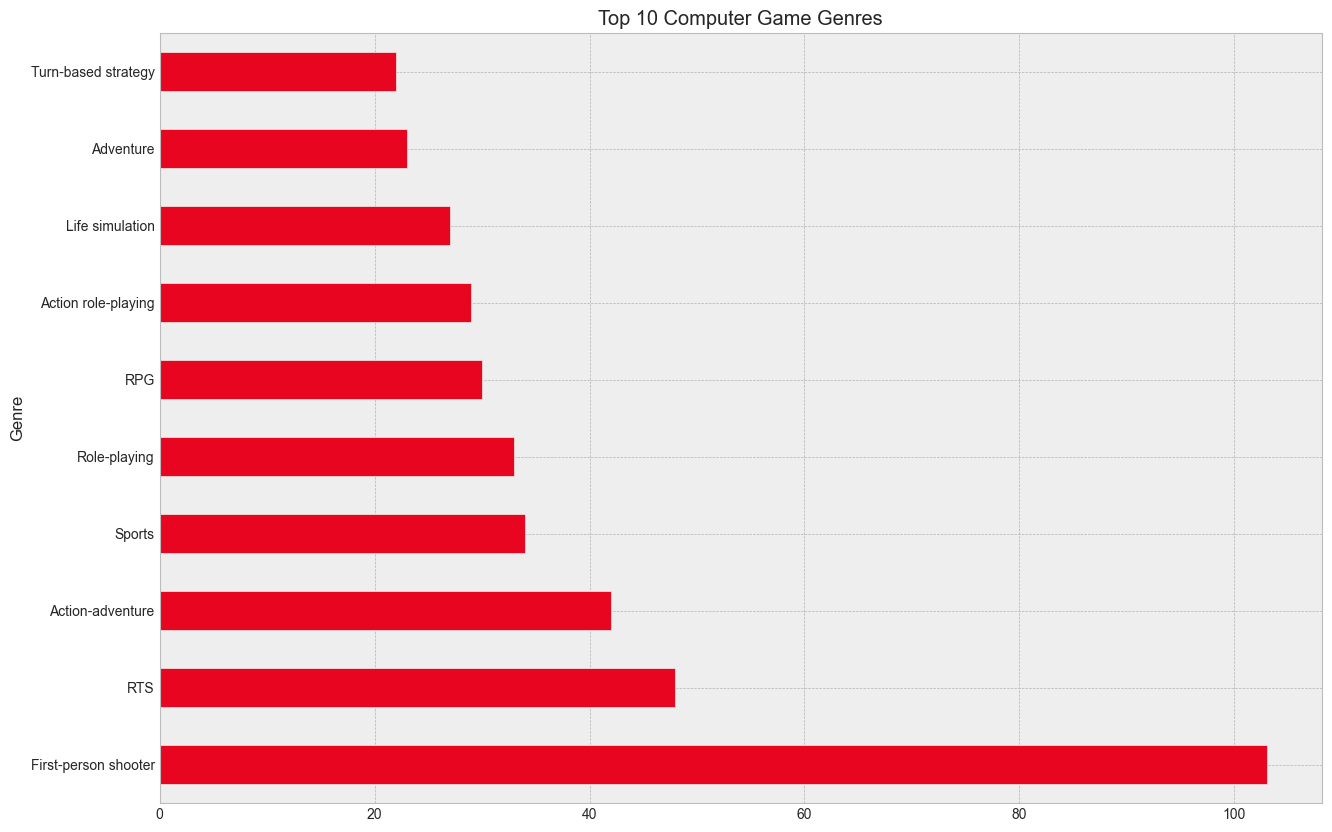

In [14]:
# Top 10 Computer Game Genres
plt.style.use("bmh")
plt.figure(figsize=(15,10))
top_10_game_genres.plot(kind="barh",color="#E8051F",title="Top 10 Computer Game Genres")

In [15]:
#Let's take a look at operating systems.
OS_of_Games = Computer_Games["Operating System"].value_counts().head(10)
OS_of_Games

Operating System
Microsoft Windows                  600
Microsoft Windows, macOS           191
Microsoft Windows, Linux, macOS    141
MS-DOS                              27
Microsoft Windows, Linux            15
Microsoft Windows, Mac OS X          7
Microsoft Windows,                   6
MS-DOS, Microsoft Windows            5
DOS                                  5
Microsoft Windows, OS X, Linux       5
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Computer Game Operating System'}, ylabel='Operating System'>

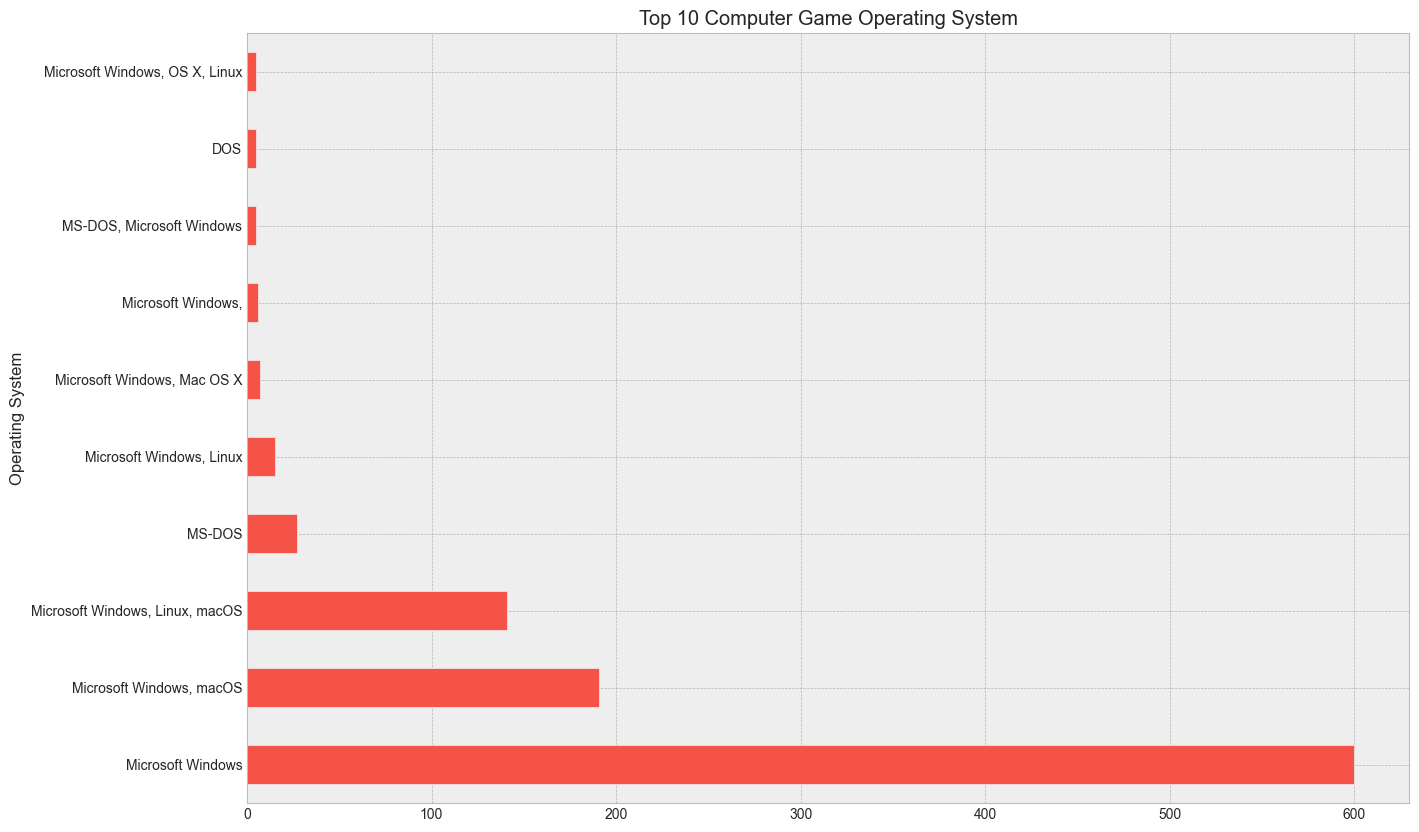

In [16]:
# Top 10 Computer Game Operating System
plt.style.use("bmh")
plt.figure(figsize=(15,10))
OS_of_Games.plot(kind="barh",color="#F55347",title="Top 10 Computer Game Operating System")

In [18]:
import plotly.express as px

In [21]:
# Geliştirici verilerini hazırlama
developer_data = pd.DataFrame(Computer_Games['Developer'].value_counts())
developer_data.rename(columns={"Developer": "Number of developer"}, inplace=True)
total_developer = developer_data["Number of developer"].sum()
developer_data["developer %"] = round(developer_data["Number of developer"] / total_developer * 100, 2)
developer_data["Name"] = developer_data.index

# Geliştirici pasta grafiği
fig = px.pie(developer_data,
             values="developer %",
             names="Name",
             title="Developer of the Game",
             template="seaborn", width=1200, height=1000)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()


KeyError: 'Number of developer'

In [ ]:
#TOP 10
developer_data = pd.DataFrame(Computer_Games['Developer'].value_counts().head(10))
developer_data.rename(columns={"Developer": "Number of developer"}, inplace=True)
total_developer = developer_data["Number of developer"].sum()
developer_data["developer %"] = round(developer_data["Number of developer"] / total_developer * 100, 2)
developer_data["Name"] = developer_data.index

In [20]:
# pie plot
fig = px.pie(developer_data,
             values="developer %",
             names="Name",
             title="Developer of the Game",
             template="seaborn",width=1200,height=1000)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['count'] but received: Name